Modelling and Evaluation Notebook

Objectives

Answer business requirement 2
The client is interested to tell whether a given cell contains a healthy leaf or a powderly_mildew


Inputs
inputs/cherry-leaves_datasets/cherry-leaves/train
inputs/cherry-leaves_datasets/cherry-leaves/test
inputs/cherry-leaves_datasets/cherry-leaves/validation
image shape embeddings


Outputs
Images distribution plot in train, validation and test sets
Image augmentation
Class indices to change prediction inference in labels 
Machine learning model creation and training
Save model
Learning curve plot for model performance 
Model evaluation on pickle file
Prediction on the random image file

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('c:/python_projects/project_5/jupyter_notebooks')
print("You set a new current directory")

You set a new current directory


In [4]:
current_dir = os.getcwd()
current_dir

'c:\\python_projects\\project_5\\jupyter_notebooks'

In [5]:
my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves'
train_path=my_data_dir +'/train'
validation_path=my_data_dir + '/validation'
test_path=my_data_dir + '/test'

In [6]:
print(f"Train path: {train_path}")
print(f"Labels: {labels}")

Train path: inputs/cherry-leaves_dataset/cherry-leaves/train


NameError: name 'labels' is not defined

In [33]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\python_projects\project_5\jupyter_notebooks


In [34]:
import os
my_data_dir='inputs/cherry-leaves_dataset/cherry-leaves'
train_path=my_data_dir +'/train'
train_path = '../inputs/cherry-leaves_dataset/cherry-leaves/train'
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


In [35]:
version='v1'
file_path=f'outputs/{version}'
if os.path.exists(file_path):
    print('Old version is already available. Create a new version if needed.')
else:
    os.makedirs(file_path)
    print(f'Created new folder: {file_path}')
    


Old version is already available. Create a new version if needed.


In [36]:
train_path = '../inputs/cherry-leaves_dataset/cherry-leaves/train'

labels = ['healthy', 'powdery_mildew']

In [37]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"../outputs/v1/image_shape.pkl")
image_shape

(256, 256, 3)

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




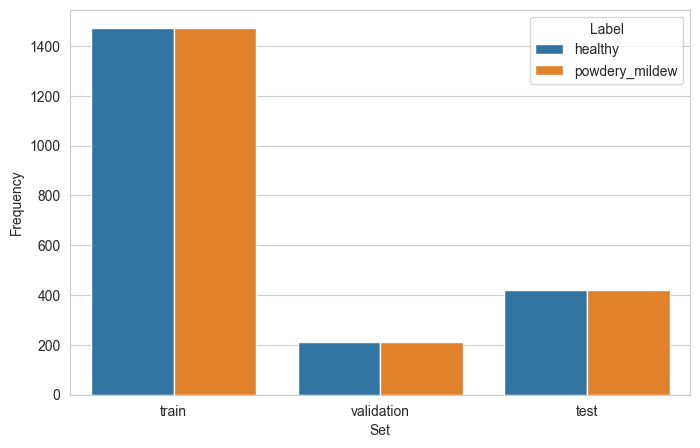

In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_data_dir = '../inputs/cherry-leaves_dataset/cherry-leaves'
labels = ['healthy', 'powdery_mildew']
folders = ['train', 'validation', 'test']

# Create an empty dictionary
data = {
    'Set': [],
    'Label': [],
    'Frequency': []
}

# Loop to dynamically create and append rows
for folder in folders:
    for label in labels:
        label_path = os.path.join(my_data_dir, folder, label)
        if os.path.exists(label_path):
            frequency = len(os.listdir(label_path))
            print(f"* {folder} - {label}: {frequency} images")
            row = {
                'Set': folder,
                'Label': label,
                'Frequency': frequency
            }
            for key, value in row.items():
                data[key].append(value)
        else:
            print(f" Folder not found: {label_path}")

# Convert the dictionary to a DataFrame
df_freq = pd.DataFrame(data)

print("\n")
# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',bbox_inches='tight',dpi=150)

plt.show()

Image data augmentation 


ImageDataGenerator 


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Initialize ImageDataGenerator

In [40]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                        width_shift_range=0.10,
                                        height_shift_range=0.10,
                                        shear_range=0.1,
                                        zoom_range=0.1,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        fill_mode='nearest',
                                        rescale=1./255
                                        )

In [41]:
#image_shape='../outputs/v1/image_shape.pkl'
train_path = '../inputs/cherry-leaves_dataset/cherry-leaves/train'
batch_size = 20  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                    target_size=image_shape[:2],
                                                    color_mode='rgb',
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    shuffle=True
                                                    )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [42]:
validation_path = '../inputs/cherry-leaves_dataset/cherry-leaves/validation'
test_path='../inputs/cherry-leaves_dataset/cherry-leaves/test'

In [43]:
batch_size = 20
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(validation_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

In [44]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                target_size=image_shape[:2],
                                                                color_mode='rgb',
                                                                batch_size=batch_size,
                                                                class_mode='binary',
                                                                shuffle=False
                                                                )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Plot augmented training image

(20, 256, 256, 3)


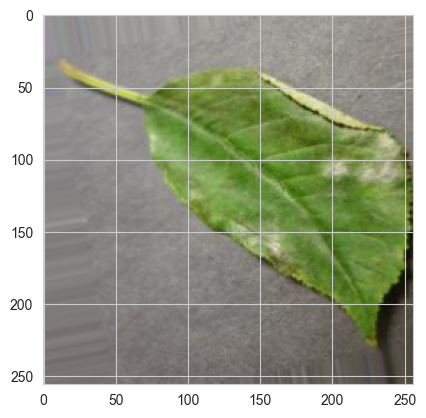

(20, 256, 256, 3)


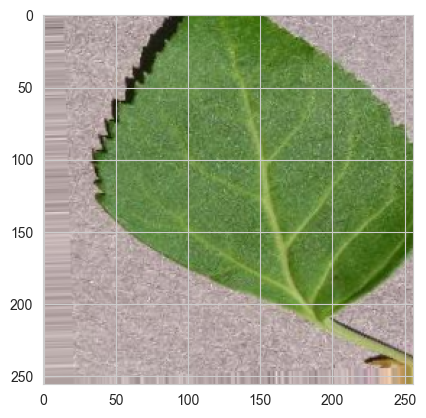

(20, 256, 256, 3)


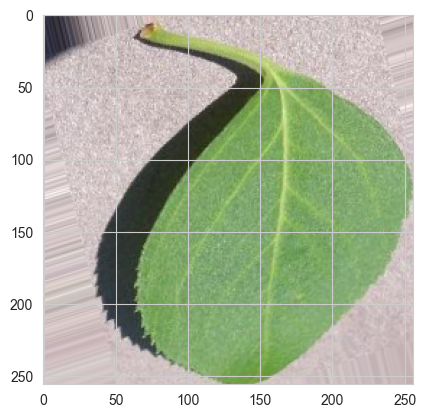

In [45]:
import matplotlib.pyplot as plt
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot augmented validation image

(20, 256, 256, 3)


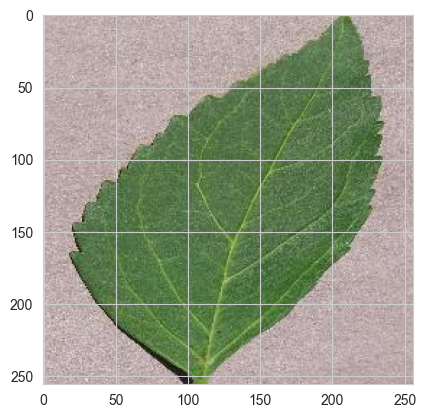

(20, 256, 256, 3)


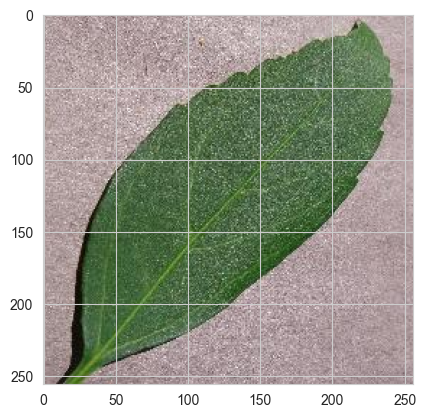

(20, 256, 256, 3)


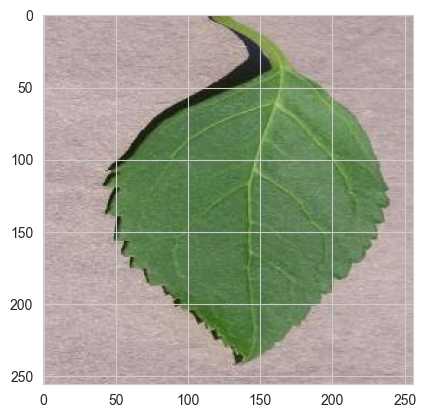

In [46]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Plot augmented test image

(20, 256, 256, 3)


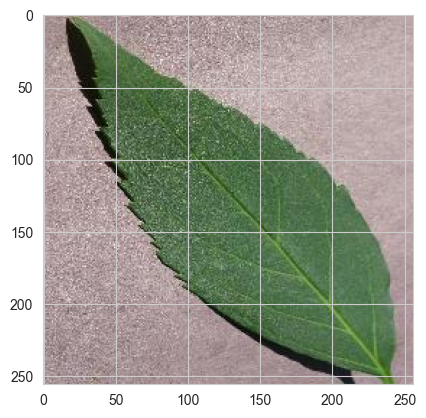

(20, 256, 256, 3)


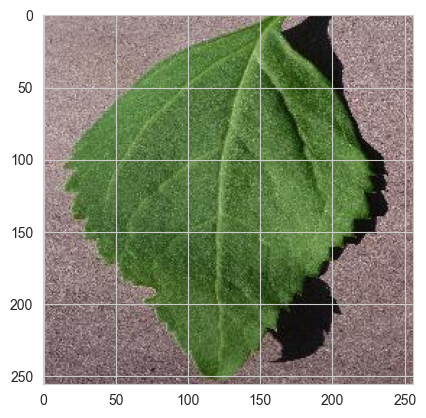

(20, 256, 256, 3)


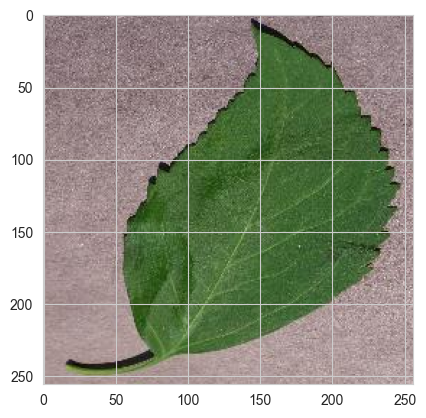

In [47]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

Save class_indices

In [48]:
import joblib
import os
version="v1"
file_path=f'outputs/{version}'

os.makedirs(file_path, exist_ok=True)
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

Model Creation

ML model

Import model packages

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

Model

In [9]:
#image_shape='C:\\python_projects\\project_5\\jupyter_notebooks\\outputs\\v1\\image_shape.pkl'
image_shape='../outputs/v1/image_shape.pkl'

In [50]:
from keras.models import Sequential
from keras.layers import Input, Conv2D

def create_tf_model():
        model = Sequential()

        model.add(Input(shape=(256, 256, 3)))
        model.add(Conv2D(filters=32, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=64, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(filters=64, kernel_size=(3, 3),
                input_shape=image_shape, activation='relu', ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))

        model.add(Dropout(0.5))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

        return model

In [75]:
!pip install pydot
from tensorflow.keras.utils import plot_model
model = create_tf_model()
plot_model(model, to_file='model_plot.png', show_shapes=True)

Defaulting to user installation because normal site-packages is not writeable
You must install pydot (`pip install pydot`) for `plot_model` to work.


Model Summary

In [51]:
create_tf_model().summary()

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,429,377 (28.34 MB)

 Trainable params: 7,429,377 (28.34 MB)

 Non-trainable params: 0 (0.00 B)

Early Stopping

In [52]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

Fit model for model training

Save model

In [53]:
model = create_tf_model()
model.fit(train_set,
        epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
        validation_data=validation_set,
        callbacks=[early_stop],
        verbose=1
        )


C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 108s 706ms/step - accuracy: 0.6443 - loss: 0.6856 - val_accuracy: 0.9810 - val_loss: 0.0446
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 1:04 444ms/step - accuracy: 0.9500 - loss: 0.0796

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9500 - loss: 0.0796 - val_accuracy: 0.9810 - val_loss: 0.0496
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 119s 809ms/step - accuracy: 0.9575 - loss: 0.1261 - val_accuracy: 0.9833 - val_loss: 0.0582
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9500 - loss: 0.1426 - val_accuracy: 0.9810 - val_loss: 0.0469


In [54]:
model.save('outputs/v1/my_model.keras')

Model Performance

Model learning curve

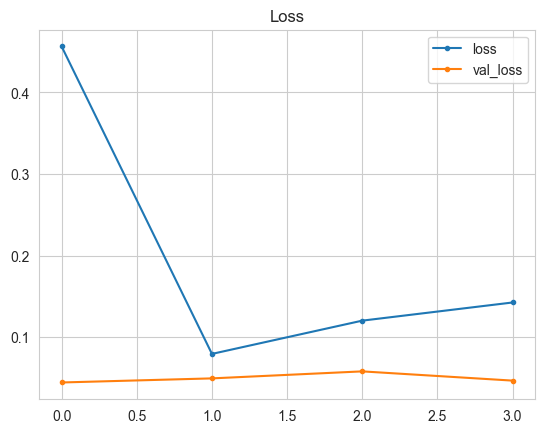

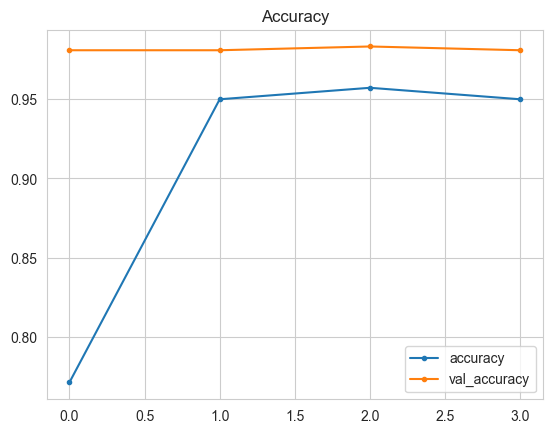

In [55]:
import pandas as pd
import seaborn as sns

losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

Model Evaluation

Load saved model

In [56]:
from keras.models import load_model
model = load_model('outputs/v1/my_model.keras')

Evaluate model on test set

In [57]:
import os
test_path = os.path.abspath("../inputs/cherry-leaves_dataset/cherry-leaves/test")
print(test_path)

c:\python_projects\project_5\inputs\cherry-leaves_dataset\cherry-leaves\test


In [58]:
from keras.models import load_model
model = load_model('outputs/v1/my_model.keras')

In [59]:
evaluation = model.evaluate(test_set)

C:\Users\omer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9949 - loss: 0.0308


In [60]:
print(model.input_shape)

(None, 256, 256, 3)


Save evaluation pickle

In [61]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

Predict on new data

Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


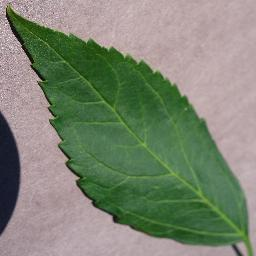

In [62]:

from tensorflow.keras.preprocessing import image
import os

test_path = '../inputs/cherry-leaves_dataset/cherry-leaves/test'
image_shape = (256, 256)

pointer = 66
label = labels[0]  # select Healthy or powdery_mildew

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                        target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [63]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [64]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
0.99641395
healthy


In [65]:
!cat .gitignore

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [66]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Modelling and Evaluating.ipynb
	modified:   outputs/v1/evaluation.pkl
	modified:   outputs/v1/model_training_acc.png
	modified:   outputs/v1/model_training_losses.png
	modified:   outputs/v1/my_model.keras

no changes added to commit (use "git add" and/or "git commit -a")


In [67]:
!git add .

In [68]:
!git commit -am " Added model and  new plots "

[main 68ab544e]  Added model and  new plots
 5 files changed, 213 insertions(+), 108 deletions(-)


In [69]:
!git push

bash: line 1: /dev/tty: No such device or address
error: failed to execute prompt script (exit code 1)
fatal: could not read Username for 'https://github.com': No such file or directory
